In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./dummy_dataset.csv")

In [3]:
data.head()

,userid,gender,no_of_days,no_os_calls,enrolled
0,1001,Male,19,1,Yes
1,1002,Female,8,7,Yes
2,1003,Male,7,13,No
3,1004,Male,16,6,Yes
4,1005,Male,19,5,No


In [4]:
data.shape

(10000, 5)

<Axes: xlabel='no_os_calls', ylabel='no_of_days'>

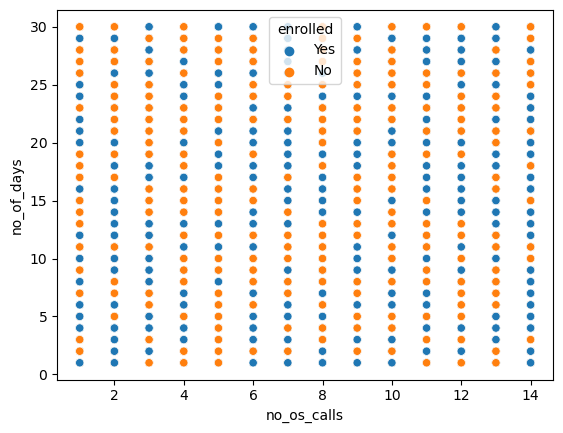

In [5]:
sns.scatterplot(data = data,x = "no_os_calls", y= "no_of_days", hue = "enrolled")

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['no_os_calls','no_of_days']].values,data['enrolled'].values,test_size = 0.33, random_state = 42)

In [7]:
mu = x_train.mean(axis = 0)
sigma = x_train.std(axis = 0)

In [8]:
x_train = (x_train-mu)/sigma
x_test = (x_test - mu)/sigma

In [9]:
def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [10]:
# def knn(X, Y, queryPoint, k=5):
#     dis = []
#     m = X.shape[0]
    
#     for i in range(m):
#         d = dist(queryPoint,X[i])
#         dis.append((d,Y[i]))
        
#     dis = sorted(dis)
#     dis = dis[:k]
    
#     dis = np.array(dis)
    
#     classes_counts = np.unique(dist[:,1], return_counts = True)
    
#     index = classes_counts[1].argmax()
#     pred = classes_counts[0][index]
    
#     return int(pred)


def knn(X, Y, queryPoint, k=5):
    label_to_int = {label: idx for idx, label in enumerate(np.unique(Y))}
    int_to_label = {idx: label for label, idx in label_to_int.items()}
    
    Y_int = np.array([label_to_int[y] for y in Y])
    
    
    dis = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint, X[i])
        dis.append((d, Y[i]))
        
    dis = sorted(dis)
    dis = dis[:k]
    
    dis = np.array(dis)
    
    classes_counts = np.unique(dis[:, 1], return_counts=True)
    
    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]
    
    return int_to_label[pred] 

In [11]:
x_test[100]

array([-1.60233519,  1.45238942])

In [13]:
knn(x_train, y_train, x_test[100])

KeyError: 'No'

In [14]:
import numpy as np

def dist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def knn(X, Y, queryPoint, k=5):
    # Create a mapping from labels to integers
    label_to_int = {label: idx for idx, label in enumerate(np.unique(Y))}
    int_to_label = {idx: label for label, idx in label_to_int.items()}
    
    # Convert Y to integer labels
    Y_int = np.array([label_to_int[y] for y in Y])
    
    dis = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint, X[i])
        dis.append((d, Y_int[i]))  # Append integer label
    
    dis = sorted(dis)
    dis = dis[:k]
    
    dis = np.array(dis)
    
    classes_counts = np.unique(dis[:, 1], return_counts=True)
    
    index = classes_counts[1].argmax()
    pred_int = classes_counts[0][index]
    
    # Convert the predicted integer label back to the original label
    return int_to_label[pred_int]

# Example usage:
pred_label = knn(x_train, y_train, x_test[100])
print(pred_label)


No


In [15]:
y_test[100]

'No'

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
knn = KNeighborsClassifier()


knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(x_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[852, 796],
       [811, 841]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.51      0.52      0.51      1648
         Yes       0.51      0.51      0.51      1652

    accuracy                           0.51      3300
   macro avg       0.51      0.51      0.51      3300
weighted avg       0.51      0.51      0.51      3300



In [21]:
knn = KNeighborsClassifier(p=1)


knn.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [22]:
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.51      0.52      0.51      1648
         Yes       0.51      0.51      0.51      1652

    accuracy                           0.51      3300
   macro avg       0.51      0.51      0.51      3300
weighted avg       0.51      0.51      0.51      3300



In [23]:
train_accuracy = []
test_accuracy = []

for i in range(1,20):
    kn = KNeighborsClassifier(n_neighbors = i)
    kn.fit(x_train, y_train)
    
    tr = kn.score(x_train, y_train)
    te = kn.score(x_test, y_test)
    
    train_accuracy.append(tr)
    test_accuracy.append(te)

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

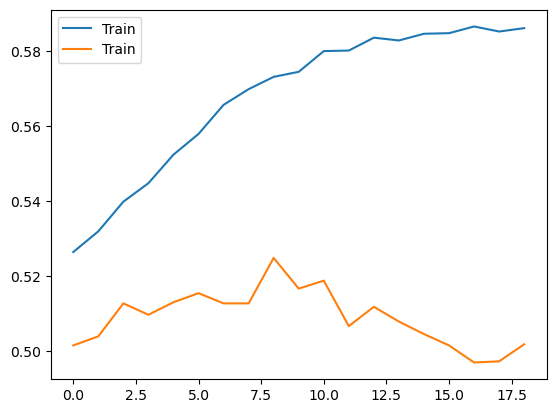

In [24]:
plt.plot(train_accuracy, label = "Train")
plt.plot(test_accuracy, label = "Train")
plt.legend()
plt.xlabel("")
plt.ylabel()
plt.xticks(np.arrange(1,20))
plt.show()

C:\Users\Ishita Bhojani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

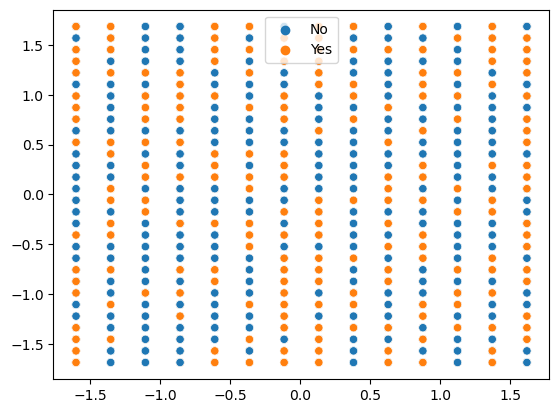

In [25]:
sns.scatterplot(x_train[:,0], x_train[:,1], hue = y_train)

## Load the mnist dataset in csv format 

In [32]:
mnist = pd.read_csv('./Data/mnist_test.csv')

In [33]:
mnist.shape

(10000, 785)

In [34]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
mnist_label = mnist['label']
mnist_data = mnist.drop(columns = ['label'])

In [36]:
def plot_img(img):
    plt.imshow(img.reshape(28,28),cmap= 'gray')
    plt.axis(False)

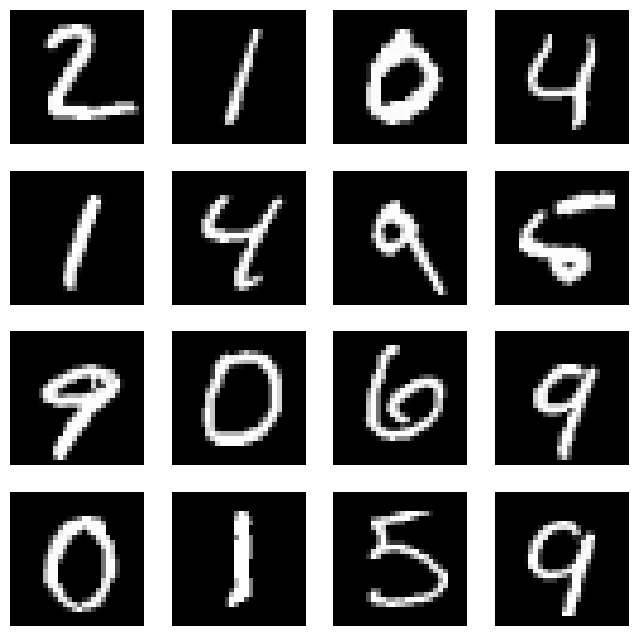

In [38]:
plt.figure(figsize = (8,8))
for i in range(1,17):
    plt.subplot(4,4,i)
    plot_img(mnist_data.iloc[i].values)

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components = 2)

In [42]:
X = pca.fit_transform(mnist_data)

In [45]:
print(X[:5])

[[-411.26099613 -686.56161016]
 [  58.06593519  983.17025995]
 [-935.10533853  459.07466105]
 [1255.66650618 -106.99254128]
 [ 132.88704929 -744.54184514]]


In [47]:
df = pd.DataFrame(X, columns = ['f1', 'f2'])
df['y'] = mnist_label

df.head()

,f1,f2,y
0,-411.260996,-686.561610,7
1,58.065935,983.170260,2
2,-935.105339,459.074661,1
3,1255.666506,-106.992541,0
4,132.887049,-744.541845,4


<Axes: xlabel='f1', ylabel='f2'>

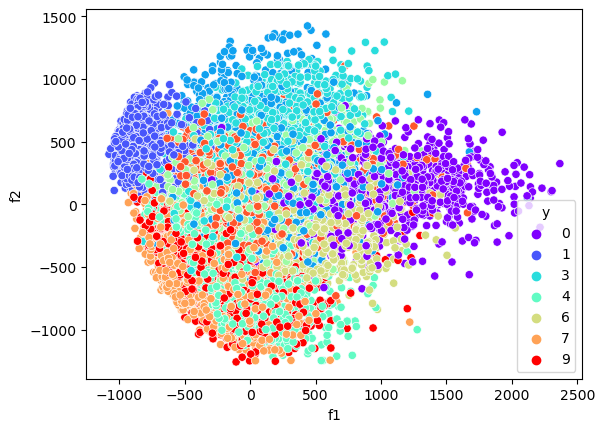

In [49]:
sns.scatterplot(data= df, x = 'f1',y = 'f2', hue = 'y', palette = 'rainbow')

In [53]:
x_train, x_test, y_train, y_test = train_test_split(df[['f1','f2']].values, df['y'].values,test_size= 0.33, random_state = 42)

In [58]:
knn2= KNeighborsClassifier(n_neighbors = 10 )
knn2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [64]:
y_pred = knn2.predict(x_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       317
           1       0.90      0.94      0.92       384
           2       0.31      0.28      0.29       338
           3       0.51      0.54      0.53       338
           4       0.37      0.43      0.40       346
           5       0.20      0.22      0.21       272
           6       0.40      0.35      0.37       328
           7       0.43      0.45      0.44       323
           8       0.31      0.27      0.29       315
           9       0.33      0.25      0.28       339

    accuracy                           0.46      3300
   macro avg       0.44      0.45      0.44      3300
weighted avg       0.45      0.46      0.45      3300



In [66]:
confusion_matrix(y_test, y_pred)

array([[241,   0,  24,   3,   0,   9,  34,   0,   6,   0],
       [  0, 360,   6,   6,   1,   2,   1,   3,   5,   0],
       [ 41,   4,  94,  64,  10,  56,  32,   2,  34,   1],
       [ 10,   6,  52, 183,   3,  28,   3,   5,  46,   2],
       [  2,   3,   5,   3, 148,   9,  17,  64,   4,  91],
       [ 31,   5,  45,  34,  16,  59,  27,   6,  47,   2],
       [ 49,   3,  31,  12,  20,  59, 115,   3,  30,   6],
       [  0,   9,   5,   1,  69,  11,   9, 146,   8,  65],
       [ 24,   6,  38,  52,  14,  52,  34,   5,  84,   6],
       [  2,   5,   4,   1, 115,   4,  14, 102,   7,  85]], dtype=int64)